## Opis zmiennych w ramce danych

1. variety - Odmiana banana : (Blue Java, Burro, Cavendish, Fehi, Lady Finger, Manzano, Plantain, Red Dacca)
2. region - Kraj/region, w którym wyhodowano banana : (Brazil, Colombia, Costa Rica, Ecuador, Guatemala, Honduras, India, Philippines)
3. quality_category - Kategoria jakościowa banana : (Good, Premium, Processing, Unripe)
4. ripeness_index - Wskaźnik dojrzałości banana : (1.02 - 7.00)
5. ripeness_category - Kategoria określająca stopień dojrzałości : (Green, Overripe, Ripe, Turning)
6. sugar_content_brix - Zawartość cukru w bananie : (Brix – miara słodkości)
7. firmness_kgf - Twardość banana : (kgf – kilogram-siła)
8. length_cm - Długość banana w centymetrach
9. weight_g - Masa banana w gramach
10. harvest_date - Data zbioru banana
11. tree_age_years - Wiek drzewa bananowego
12. altitude_m - Wysokość nad poziomem morza, na której rosło drzewo
13. rainfall_mm - Suma opadów w regionie uprawy
14. soil_nitrogen_ppm - Zawartość azotu w glebie : (ppm - części na milion)

## Import potrzebnych bibliotek do analizy danych

In [391]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

## Wczytanie ramki danych

In [392]:
df = pd.read_csv("banana_quality_dataset.csv")
df.sample(5)

sample_id      variety      region  quality_score quality_category  \
716        717    Red Dacca    Honduras           2.25       Processing   
750        751         Fehi      Brazil           2.17       Processing   
133        134        Burro   Guatemala           2.34       Processing   
846        847  Lady Finger    Honduras           2.59             Good   
164        165  Lady Finger  Costa Rica           2.05       Processing   

     ripeness_index ripeness_category  sugar_content_brix  firmness_kgf  \
716            1.35             Green               19.53          2.03   
750            4.21              Ripe               17.72          4.53   
133            2.32           Turning               18.69          2.95   
846            1.73             Green               20.51          4.87   
164            1.96             Green               18.30          0.75   

     length_cm  weight_g harvest_date  tree_age_years  altitude_m  \
716      21.92    112.01   2023-09-22             3.6       334.9   
750      16.82    121.41   2023-09-14             7.2       237.4   
133      22.67     82.72   2023-10-17             3.4       243.3   
846      28.96    115.96   2023-10-29             9.5      1248.2   
164      22.14    105.15   2023-10-26             6.6      1066.7   

     rainfall_mm  soil_nitrogen_ppm  
716       2050.9               50.9  
750       2219.4               75.6  
133       1747.2               61.0  
846       2866.2              171.1  
164       1752.6              192.4

In [393]:
df.shape

(1000, 16)

In [394]:
df['harvest_date'].sort_values()

468    2023-09-01
262    2023-09-01
824    2023-09-01
473    2023-09-01
580    2023-09-01
          ...    
847    2023-10-31
438    2023-10-31
287    2023-10-31
596    2023-10-31
125    2023-10-31
Name: harvest_date, Length: 1000, dtype: object

Usuwamy niepotrzebne kolumny - pierwszą kolumnę z numerami próbek (sample_id) oraz kolumnę quality_score w związku z tym, że jest ona jedną z dwóch do wyboru zmiennych celu (wraz z quality_category), a interesuje nas klasyfikacja wieloklasowa, więc wybieramy quality_category. Usuwamy też, harvest_date w związku z tym, że daty próbek są bardzo zbliżone do siebie oraz ripeness_category gdyż jest to powielenie ripeness_index.

In [395]:
df = df.drop(["sample_id",
             "quality_score",
             "harvest_date", "ripeness_category"], 
             axis=1)

## Podział na zmienne kategoryczne i numeryczne

In [396]:
numerical_features = list(df.dtypes[(df.dtypes != 'object') & (df.dtypes != 'category')].index)
categorical_features = list(df.dtypes[(df.dtypes == 'object') | (df.dtypes == 'category')].index) 

## Obliczenie średniej, odchylenia standardowego, minimum, maksimum i wszystkich kwartyli w tym mediany

In [397]:
df.describe().transpose()

count        mean         std      min        25%  \
ripeness_index      1000.0     4.04217    1.753211     1.02     2.4475   
sugar_content_brix  1000.0    18.51683    2.034812    15.00    16.8275   
firmness_kgf        1000.0     2.70684    1.289252     0.50     1.5900   
length_cm           1000.0    19.88210    5.736318    10.00    14.9025   
weight_g            1000.0   164.73893   49.163073    81.05   122.3975   
tree_age_years      1000.0    10.87960    5.215554     2.00     6.3000   
altitude_m          1000.0   723.55670  427.372855     0.40   353.9500   
rainfall_mm         1000.0  1972.99280  564.467912  1000.50  1498.7500   
soil_nitrogen_ppm   1000.0   104.39130   53.607794    10.00    60.1500   

                         50%        75%      max  
ripeness_index         4.110     5.5625     7.00  
sugar_content_brix    18.500    20.3125    21.98  
firmness_kgf           2.680     3.8200     5.00  
length_cm             19.890    24.8000    29.95  
weight_g             163.365   205.7750   249.89  
tree_age_years        10.700    15.6000    20.00  
altitude_m           726.000  1071.7250  1498.40  
rainfall_mm         1957.400  2431.8000  2992.00  
soil_nitrogen_ppm    104.100   149.8500   199.90

## Obliczenie skośności

In [398]:
df[numerical_features].skew()

ripeness_index       -0.059245
sugar_content_brix   -0.022406
firmness_kgf          0.030561
length_cm             0.031794
weight_g              0.032442
tree_age_years        0.059766
altitude_m            0.063876
rainfall_mm           0.056509
soil_nitrogen_ppm     0.014225
dtype: float64

## Wyświetlenie typów kolumn

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   variety             1000 non-null   object 
 1   region              1000 non-null   object 
 2   quality_category    1000 non-null   object 
 3   ripeness_index      1000 non-null   float64
 4   sugar_content_brix  1000 non-null   float64
 5   firmness_kgf        1000 non-null   float64
 6   length_cm           1000 non-null   float64
 7   weight_g            1000 non-null   float64
 8   tree_age_years      1000 non-null   float64
 9   altitude_m          1000 non-null   float64
 10  rainfall_mm         1000 non-null   float64
 11  soil_nitrogen_ppm   1000 non-null   float64
dtypes: float64(9), object(3)
memory usage: 93.9+ KB


In [400]:
df.isnull().sum()>0

variety               False
region                False
quality_category      False
ripeness_index        False
sugar_content_brix    False
firmness_kgf          False
length_cm             False
weight_g              False
tree_age_years        False
altitude_m            False
rainfall_mm           False
soil_nitrogen_ppm     False
dtype: bool

## Obsłużenie braków danych
Powyżej widać, że nie mamy braków danych, zatem nie musimy ich obsługiwać.

## Wykresy przed obsłużeniem outliers

### Histogramy

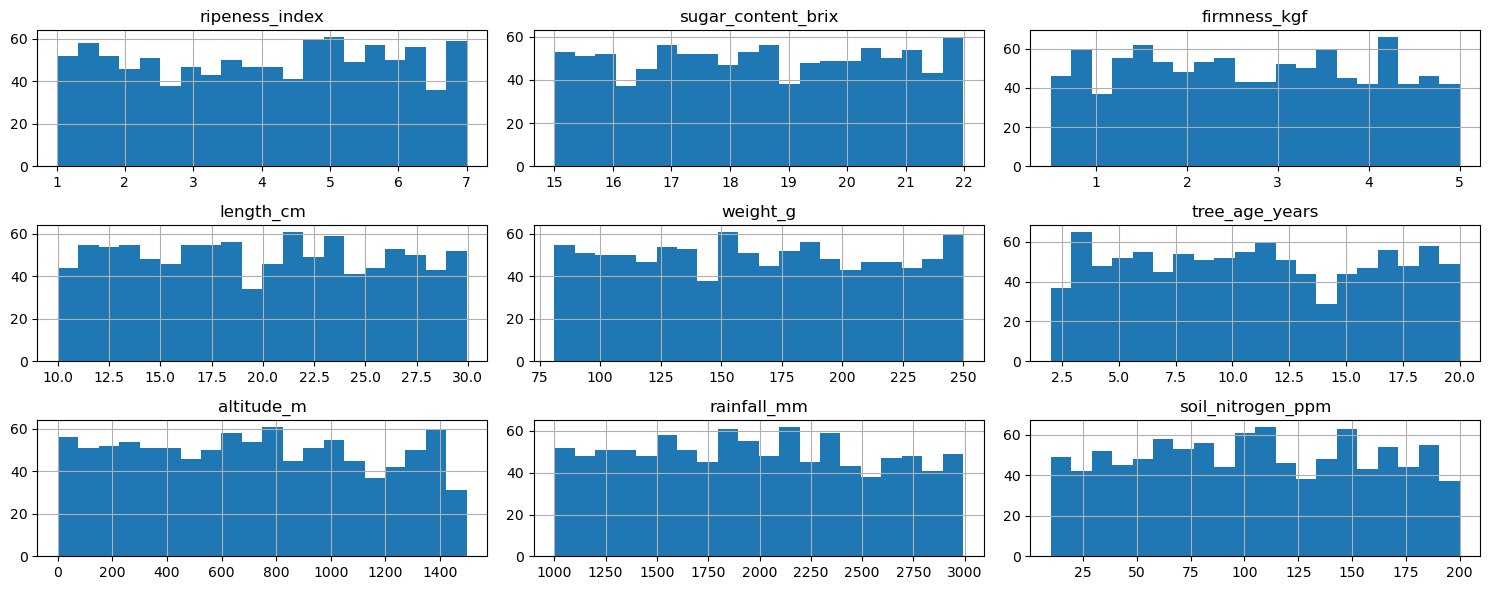

In [401]:
df.hist(bins=20, figsize=(15, 6), layout=(3, 3))
plt.tight_layout()
plt.show()

### Wykresy słupkowe

### Scalenie wartości unripe z processing i premium z good dla etykiety quality_category

Ostatecznie powstaje: 
<ul>
<li><b>1</b> - banan dobrej jakości (Good - Nadaje się w całości do sprzedaży)</li>
<li><b>0</b> - banan słabszej jakości (Processing - Nadaje się tylko do przetworzenia)</li>
</ul>

In [402]:
diction = {'Processing' : 0, 'Good' : 1 , 'Unripe': 0, 'Premium': 1}
df['quality_category'] = df['quality_category'].map(diction)

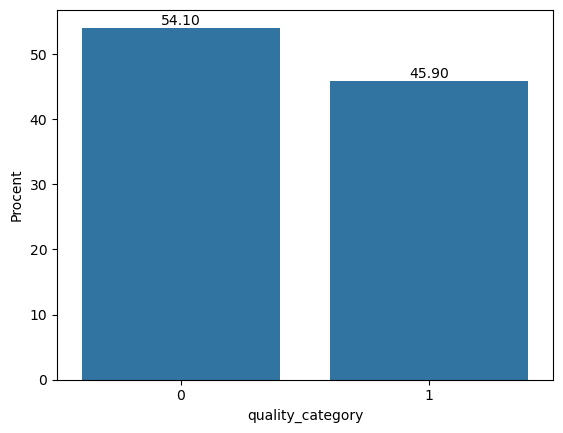

In [403]:
percents = df['quality_category'].value_counts()/df.shape[0]*100
ax = sns.barplot(x=percents.index, y=percents)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.ylabel('Procent');

### Wykresy pudełkowe

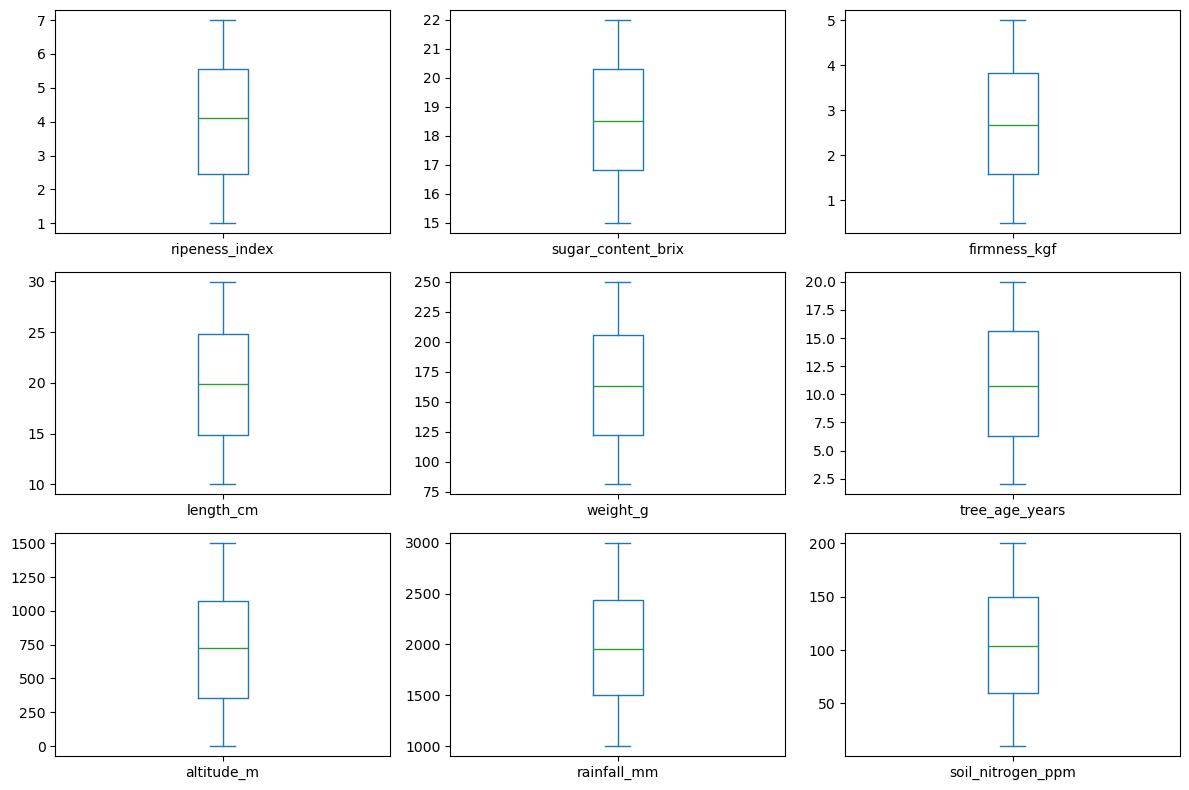

In [404]:
df[numerical_features].plot.box(subplots=True, layout=(3, 3), figsize=(12, 8))
plt.tight_layout()
plt.show()

## Obsługa outliers
Na powyższym wykresie można zauważyć, że nie ma outlierów, więc nie musimy ich obsługiwać.

## Obliczenie korelacji

In [405]:
df[numerical_features].corr()

ripeness_index  sugar_content_brix  firmness_kgf  \
ripeness_index            1.000000            0.027318     -0.005850   
sugar_content_brix        0.027318            1.000000     -0.013572   
firmness_kgf             -0.005850           -0.013572      1.000000   
length_cm                 0.032862           -0.008925     -0.044788   
weight_g                  0.030081           -0.020328      0.040061   
tree_age_years            0.042175           -0.028472     -0.016933   
altitude_m                0.050076           -0.046773     -0.022841   
rainfall_mm               0.003166           -0.005169      0.025458   
soil_nitrogen_ppm        -0.065418            0.013128      0.004460   

                    length_cm  weight_g  tree_age_years  altitude_m  \
ripeness_index       0.032862  0.030081        0.042175    0.050076   
sugar_content_brix  -0.008925 -0.020328       -0.028472   -0.046773   
firmness_kgf        -0.044788  0.040061       -0.016933   -0.022841   
length_cm            1.000000 -0.055880        0.020556   -0.008890   
weight_g            -0.055880  1.000000        0.007971    0.012290   
tree_age_years       0.020556  0.007971        1.000000    0.038132   
altitude_m          -0.008890  0.012290        0.038132    1.000000   
rainfall_mm          0.028341 -0.031945        0.001233   -0.049308   
soil_nitrogen_ppm    0.005156 -0.002808        0.013124   -0.008828   

                    rainfall_mm  soil_nitrogen_ppm  
ripeness_index         0.003166          -0.065418  
sugar_content_brix    -0.005169           0.013128  
firmness_kgf           0.025458           0.004460  
length_cm              0.028341           0.005156  
weight_g              -0.031945          -0.002808  
tree_age_years         0.001233           0.013124  
altitude_m            -0.049308          -0.008828  
rainfall_mm            1.000000           0.017463  
soil_nitrogen_ppm      0.017463           1.000000

## Generacja heat mapy korelacji

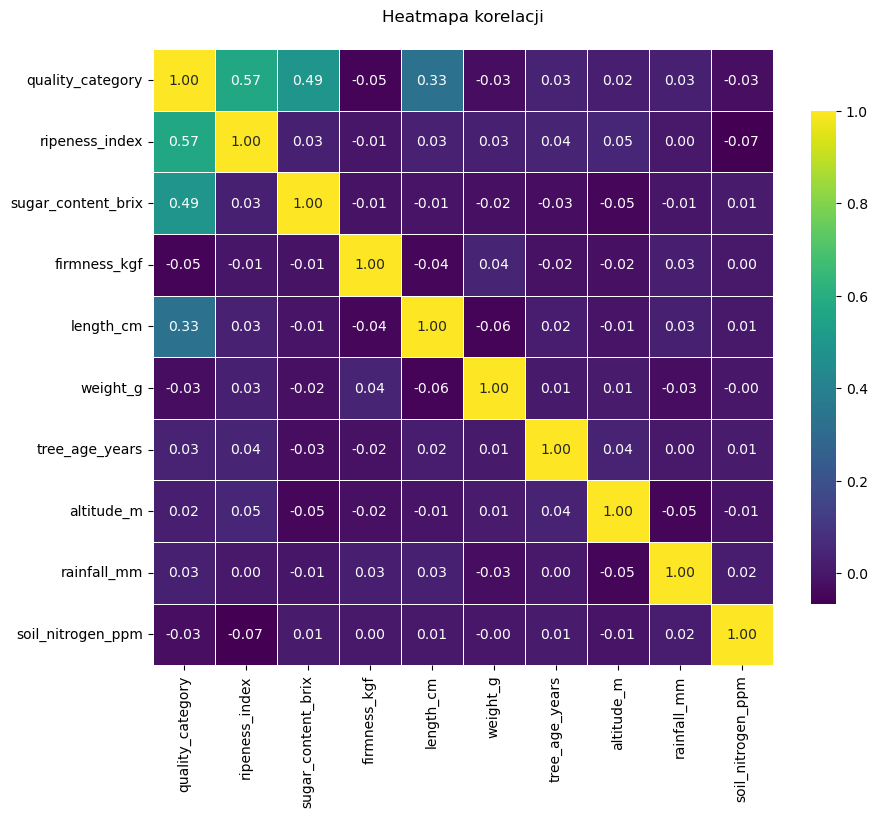

In [406]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",  
    cmap='viridis',  
    linewidths=.5,
    cbar_kws={"shrink": .8}
)
plt.xticks(rotation=90)  
plt.yticks(rotation=0)   
plt.title("Heatmapa korelacji", pad=20)
plt.show()

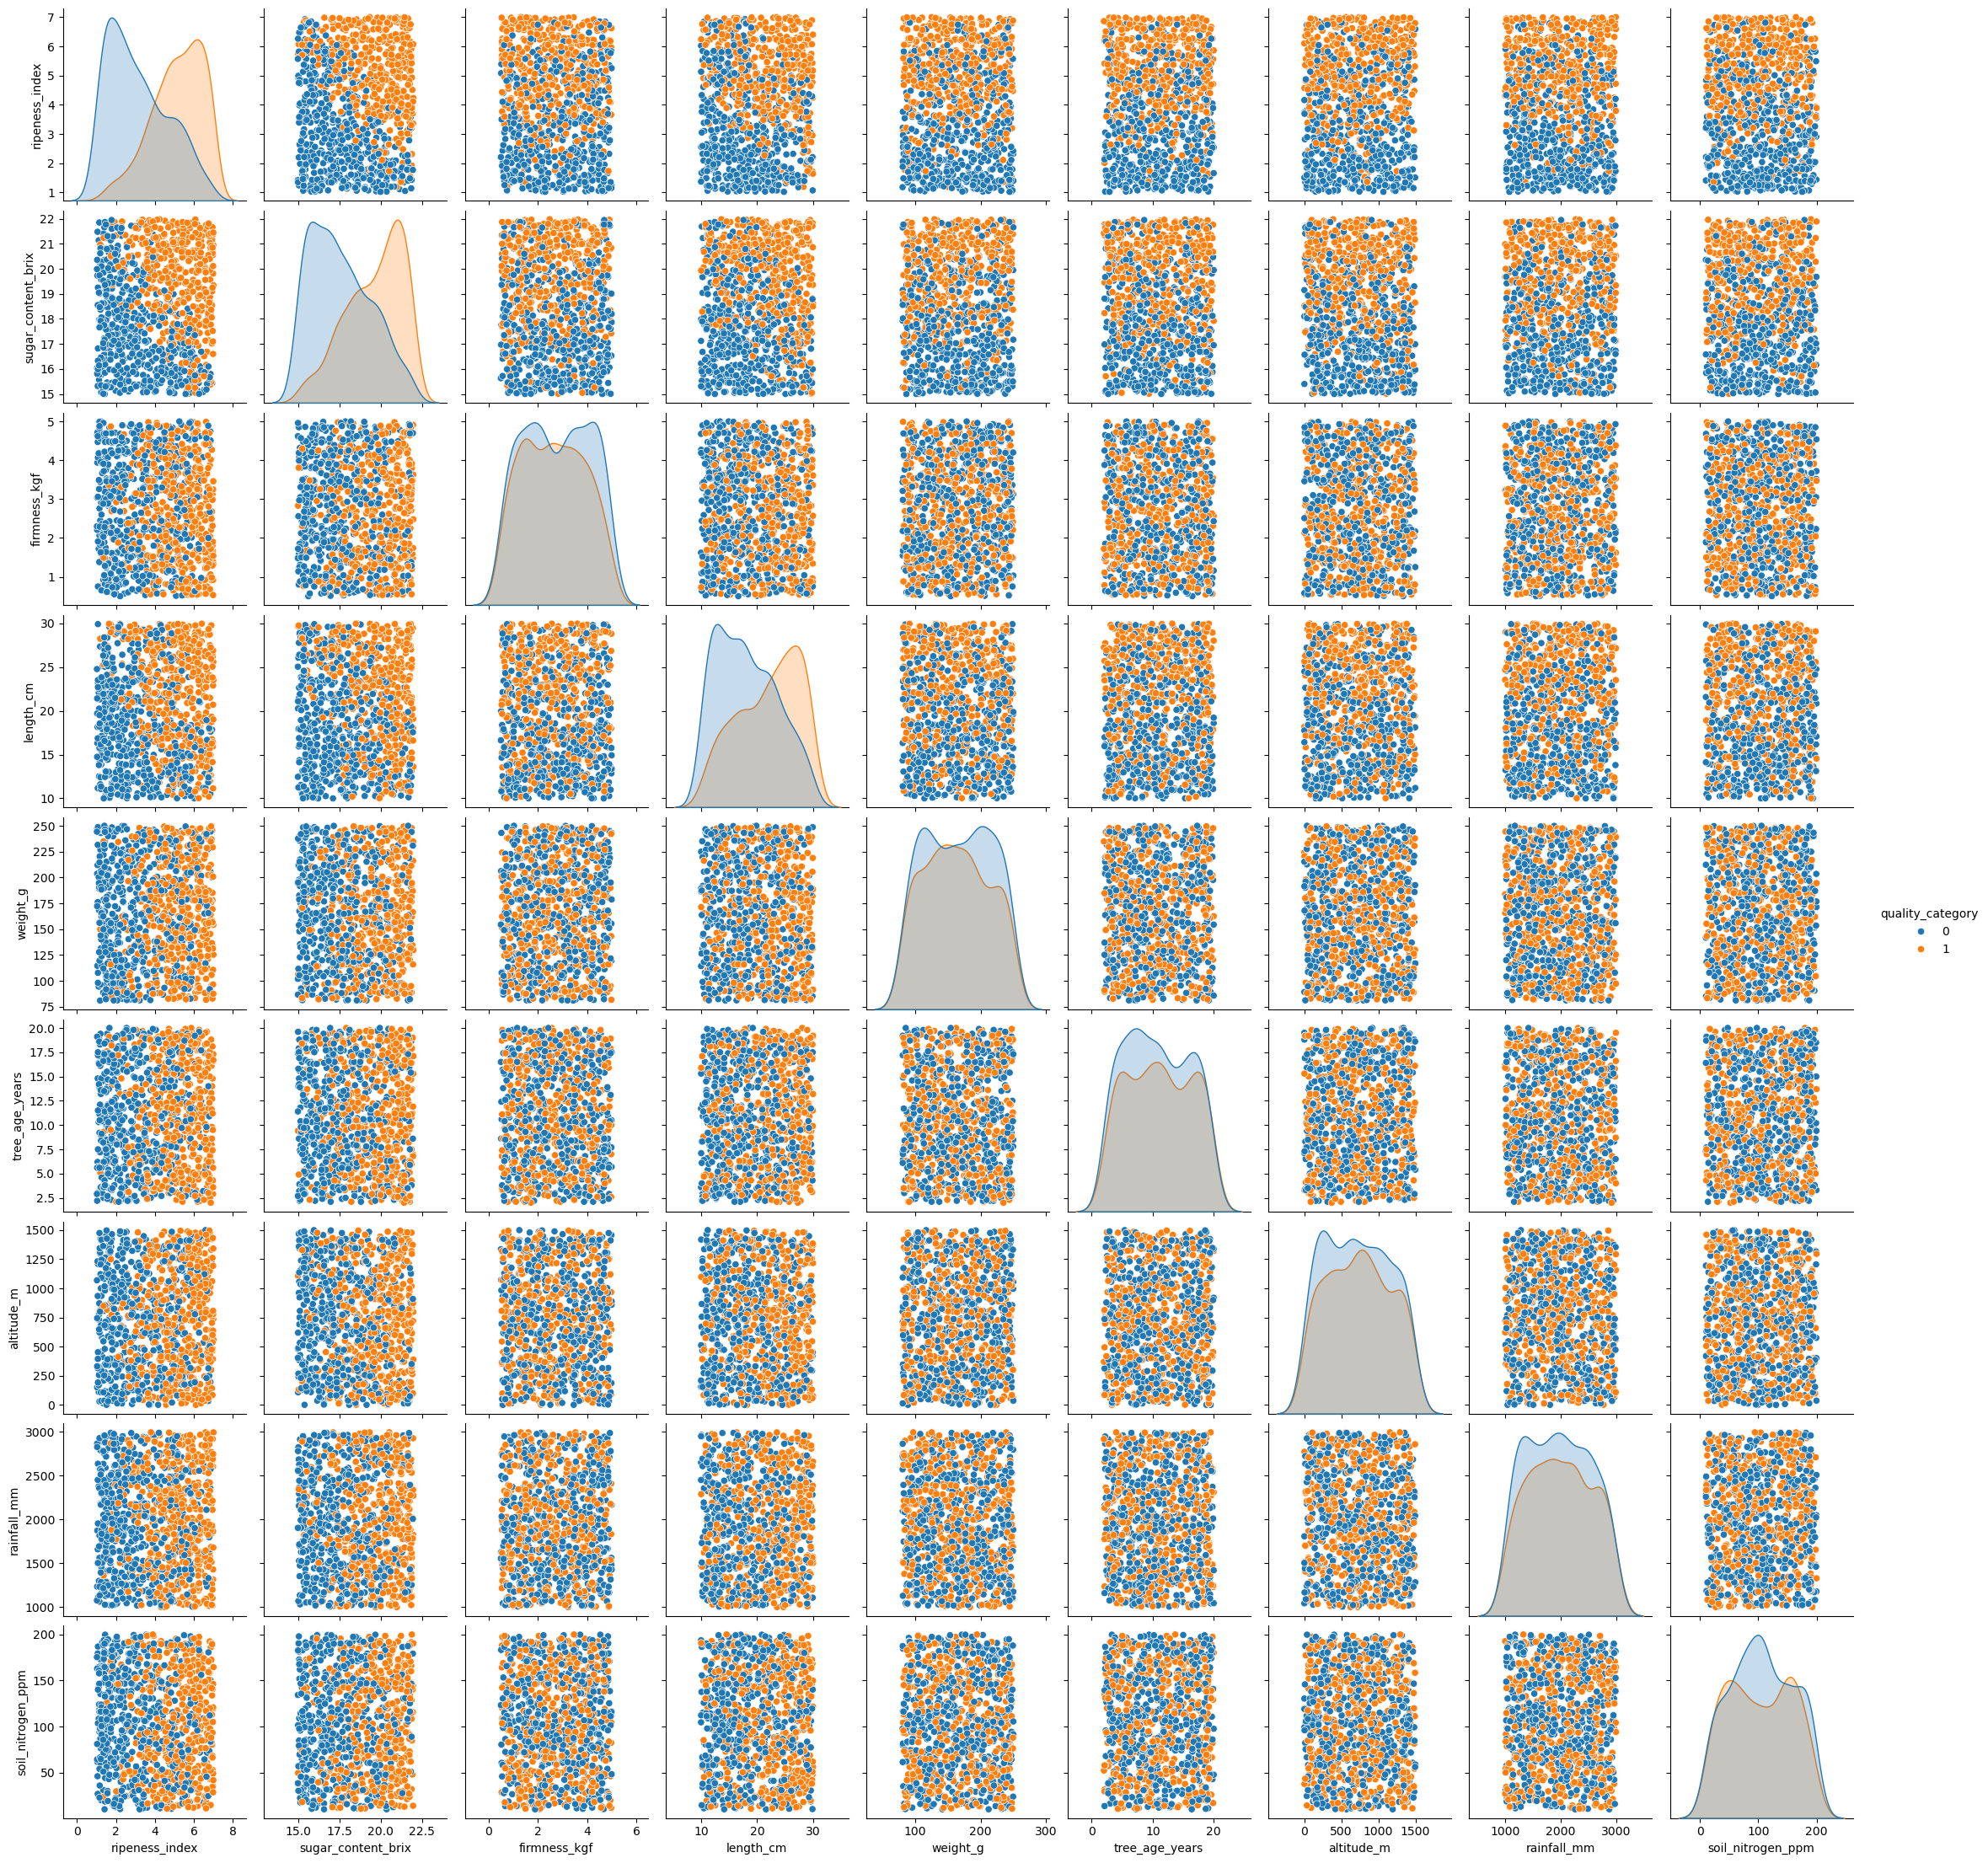

In [407]:
sns.pairplot(df, hue='quality_category')

In [408]:
df.sample(3)

variety       region  quality_category  ripeness_index  \
840    Manzano  Philippines                 1            3.23   
865  Cavendish  Philippines                 1            6.62   
278  Cavendish   Costa Rica                 0            1.85   

     sugar_content_brix  firmness_kgf  length_cm  weight_g  tree_age_years  \
840               17.75          2.89      29.11    150.96            18.5   
865               19.06          2.10      22.71    155.26             7.5   
278               19.44          2.00      12.54    239.79            17.2   

     altitude_m  rainfall_mm  soil_nitrogen_ppm  
840       852.5       2147.0              173.2  
865      1459.7       2390.5               11.0  
278      1137.6       1796.2               14.5

## Przygotowanie danych do modelu (Standaryzacja, One-Hot Encoding, Podział na dane do trenowania i dane testowe)

In [409]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

In [410]:
X = df.drop('quality_category', axis=1)
y = df['quality_category']

categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Regresja Logistyczna i walidacja krosowa

In [411]:
log_model = LogisticRegression(solver='saga', max_iter=5000,random_state=101)
param_grid = {'penalty': ['l1', 'l2'],
              'C':np.logspace(0,10,20)}

grid = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy')

log_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', grid)
])

In [412]:
log_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ripeness_index',
                                                   'sugar_content_brix',
                                                   'firmness_kgf', 'length_cm',
                                                   'weight_g', 'tree_age_years',
                                                   'altitude_m', 'rainfall_mm',
                                                   'soil_nitrogen_ppm']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['variety', 'region'])])),
                ('classifier',
                 GridSearchCV(cv=5,
                              estimator=Logis...
                              param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                                          'penalty': ['l1', 'l2']},
                              scoring='accuracy'))])

In [413]:
log_pipeline.named_steps['classifier'].best_params_

{'C': np.float64(1.0), 'penalty': 'l1'}

In [414]:
coef = log_pipeline.named_steps['classifier'].best_estimator_.coef_
coef

array([[ 7.07597477,  6.29196282, -0.44129292,  4.64073503, -0.09771064,
        -0.01317448,  0.04013656,  0.0087068 , -0.13051015,  0.        ,
         0.        ,  0.        ,  0.02738358, -0.13766158,  0.        ,
         0.16730808,  0.        ,  0.36085566, -0.21823472, -0.55889596,
         0.        ,  0.        , -0.28007425,  0.        ,  0.08455376]])

In [415]:
one_hot = pd.get_dummies(X).columns

features_coef = pd.Series(data=coef[0], index=one_hot)
features_coef[features_coef!=0].sort_values(axis=0)

region_Costa Rica     -0.558896
firmness_kgf          -0.441293
region_Honduras       -0.280074
region_Colombia       -0.218235
variety_Lady Finger   -0.137662
soil_nitrogen_ppm     -0.130510
weight_g              -0.097711
tree_age_years        -0.013174
rainfall_mm            0.008707
variety_Fehi           0.027384
altitude_m             0.040137
region_Philippines     0.084554
variety_Plantain       0.167308
region_Brazil          0.360856
length_cm              4.640735
sugar_content_brix     6.291963
ripeness_index         7.075975
dtype: float64

**Wartości ujemne** - spodziewamy, się że wraz ze wzrostem wartości dla danej cechy, szansa na przynależność do klasy 1 będzie maleć  
**Wartości dodatnie** - spodziewamy, się że wraz ze wzrostem wartości dla danej cechy, szansa na przynależność do klasy 1 będzie rosnąć

In [416]:
y_pred = log_pipeline.predict(X_test)

In [417]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score

In [418]:
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Accuracy score: {acc}\nRecall score: {recall}\nPrecision score: {precision}\nF1 score: {2*(recall*precision)/(precision+recall)}')

Accuracy score: 0.9666666666666667
Recall score: 0.951048951048951
Precision score: 0.9784172661870504
F1 score: 0.9645390070921986


In [419]:
confusion_matrix(y_test, y_pred)

array([[154,   3],
       [  7, 136]])

In [420]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       157
           1       0.98      0.95      0.96       143

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [421]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

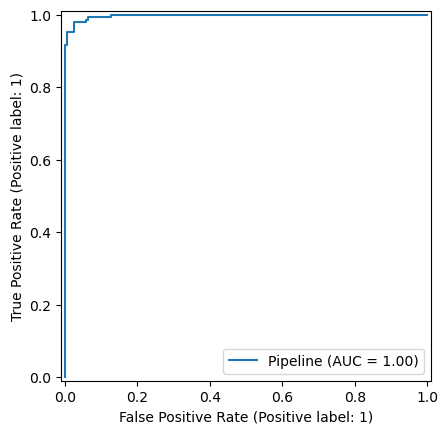

In [422]:
RocCurveDisplay.from_estimator(log_pipeline, X_test, y_test)

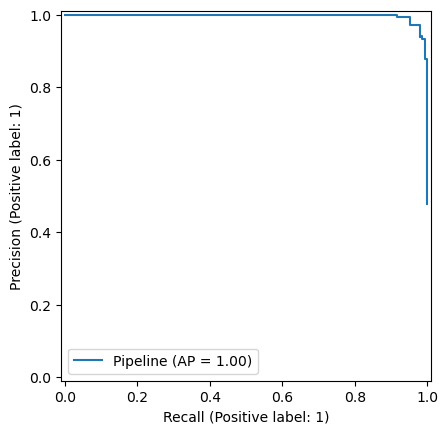

In [423]:
PrecisionRecallDisplay.from_estimator(log_pipeline, X_test, y_test)

In [424]:
X.sample(6)

variety    region  ripeness_index  sugar_content_brix  firmness_kgf  \
596      Burro    Brazil            2.64               16.90          1.53   
54     Manzano   Ecuador            6.99               20.95          3.46   
664  Cavendish     India            6.95               19.25          2.98   
403  Cavendish  Colombia            5.42               17.18          1.97   
572  Cavendish  Colombia            5.42               17.25          4.28   
124      Burro  Colombia            4.93               21.89          3.80   

     length_cm  weight_g  tree_age_years  altitude_m  rainfall_mm  \
596      24.90    140.40             4.1       314.1       2059.3   
54       25.59    154.16            17.3       735.7       2602.7   
664      26.59    185.11            18.1       536.3       2108.3   
403      17.16    122.10            17.7       606.8       2076.8   
572      14.78    219.71             3.4       222.2       1573.7   
124      25.84    235.18            16.4       615.0       1566.6   

     soil_nitrogen_ppm  
596              104.6  
54               119.4  
664               68.0  
403               67.2  
572               21.7  
124               84.7

In [425]:
final_log_model = LogisticRegression(solver='saga', penalty='l1', C=1, max_iter=5000,random_state=101)

In [426]:
sample_banana = pd.DataFrame(data=[['Burro', 'Philippines', 4, 19.3, 4, 15.1, 155, 14, 555, 2222, 114]], columns=X.columns)
label = log_pipeline.predict(sample_banana)
prob = log_pipeline.predict_proba(sample_banana)

print(f'Etykieta: {label}\nPrawdopodobieństwo: {prob}')

Etykieta: [0]
Prawdopodobieństwo: [[0.95380498 0.04619502]]


## Model SVM z wykorzystaniem GridSerach'a i walidacji krosowej

In [427]:
from sklearn.svm import SVC

In [428]:
svc_model = SVC(random_state=101, probability=True)
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(svc_model, param_grid=param_grid, cv=5, scoring='accuracy')

svc_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', grid)])

In [429]:
svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ripeness_index',
                                                   'sugar_content_brix',
                                                   'firmness_kgf', 'length_cm',
                                                   'weight_g', 'tree_age_years',
                                                   'altitude_m', 'rainfall_mm',
                                                   'soil_nitrogen_ppm']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['variety', 'region'])])),
                ('classifier',
                 GridSearchCV(cv=5,
                              estimator=SVC(probability=True, random_state=101),
                              param_grid={'C': [0.01, 0.1, 1],
                                          'kernel': ['linear', 'rbf']},
                              scoring='accuracy'))])

In [430]:
svc_pipeline.named_steps['classifier'].best_params_

{'C': 1, 'kernel': 'rbf'}

In [431]:
y_pred = svc_pipeline.predict(X_test)

In [432]:
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Accuracy score: {acc}\nRecall score: {recall}\nPrecision score: {precision}\nF1 score: {2*(recall*precision)/(precision+recall)}')

Accuracy score: 0.9533333333333334
Recall score: 0.9300699300699301
Precision score: 0.9708029197080292
F1 score: 0.9500000000000001


In [433]:
confusion_matrix(y_test, y_pred)

array([[153,   4],
       [ 10, 133]])

In [434]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       157
           1       0.97      0.93      0.95       143

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



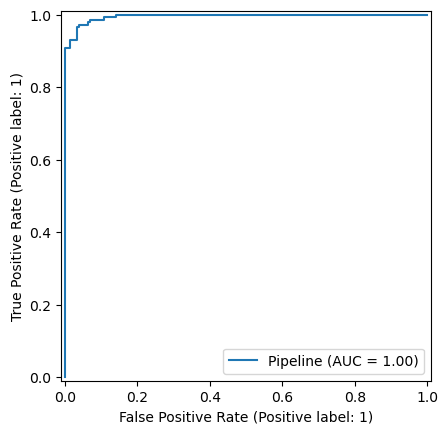

In [435]:
RocCurveDisplay.from_estimator(svc_pipeline, X_test, y_test)

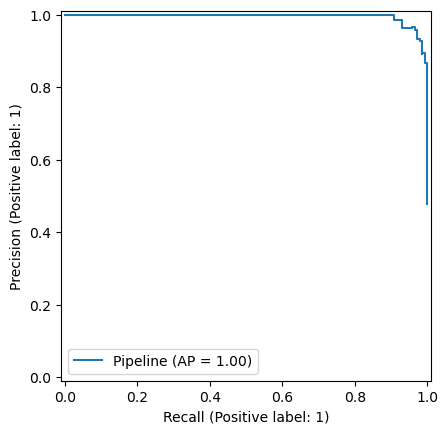

In [436]:
PrecisionRecallDisplay.from_estimator(svc_pipeline, X_test, y_test)


In [437]:
final_svc_model = SVC(kernel='rbf', C=1, random_state=101, probability=True)

## K Nearest Neighbors z wykorzystaniem GridSearch'a i walidacji krosowej

In [438]:
from sklearn.neighbors import KNeighborsClassifier

In [439]:
knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1,20)}
grid = GridSearchCV(knn_model, param_grid=param_grid, cv=5, scoring='accuracy')


knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', grid)])

In [440]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ripeness_index',
                                                   'sugar_content_brix',
                                                   'firmness_kgf', 'length_cm',
                                                   'weight_g', 'tree_age_years',
                                                   'altitude_m', 'rainfall_mm',
                                                   'soil_nitrogen_ppm']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['variety', 'region'])])),
                ('classifier',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
                              param_grid={'n_neighbors': range(1, 20)},
                              scoring='accuracy'))])

In [441]:
knn_pipeline.named_steps['classifier'].best_params_

{'n_neighbors': 17}

In [442]:
y_pred = knn_pipeline.predict(X_test)

In [443]:
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Accuracy score: {acc}\nRecall score: {recall}\nPrecision score: {precision}\nF1 score: {2*(recall*precision)/(precision+recall)}')

Accuracy score: 0.9066666666666666
Recall score: 0.9020979020979021
Precision score: 0.9020979020979021
F1 score: 0.9020979020979021


In [444]:
confusion_matrix(y_test, y_pred)

array([[143,  14],
       [ 14, 129]])

In [445]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       157
           1       0.90      0.90      0.90       143

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



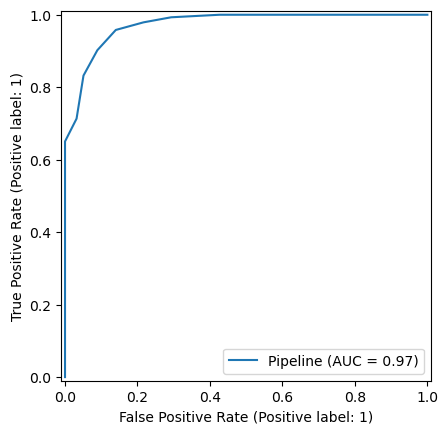

In [446]:
RocCurveDisplay.from_estimator(knn_pipeline, X_test, y_test)

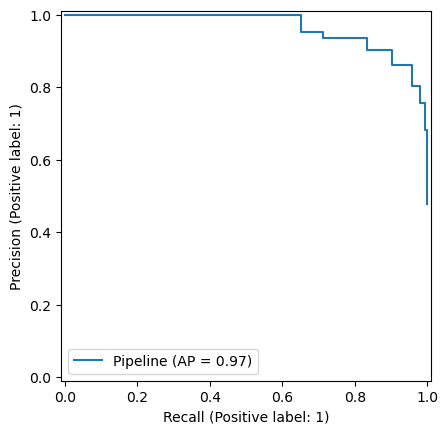

In [447]:
PrecisionRecallDisplay.from_estimator(knn_pipeline, X_test, y_test)

In [448]:
final_knn_model = KNeighborsClassifier(n_neighbors=17)

## Model hybrydowy

In [449]:
from sklearn.ensemble import VotingClassifier

voting=**'soft'** - zbiera prawdopodobieństwa przynależności do każdej klasy z każdego modelu i oblicza ich średnią

In [450]:
hybrid_model = VotingClassifier(
    estimators=[
        ('logistic', final_log_model),
        ('svc', final_svc_model),
        ('knn', final_knn_model)
    ],
    weights=[3, 2, 1],
    voting='soft'
)

hybrid_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', hybrid_model)
])


In [451]:
hybrid_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ripeness_index',
                                                   'sugar_content_brix',
                                                   'firmness_kgf', 'length_cm',
                                                   'weight_g', 'tree_age_years',
                                                   'altitude_m', 'rainfall_mm',
                                                   'soil_nitrogen_ppm']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['variety', 'region'])])),
                ('classifier',
                 VotingClassifier(estimators=[('logistic',
                                               LogisticRegression(C=1,
                                                                  max_iter=5000,
                                                                  penalty='l1',
                                                                  random_state=101,
                                                                  solver='saga')),
                                              ('svc',
                                               SVC(C=1, probability=True,
                                                   random_state=101)),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=17))],
                                  voting='soft', weights=[3, 2, 1]))])

In [452]:
y_pred = hybrid_pipeline.predict(X_test)

In [453]:
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Accuracy score: {acc}\nRecall score: {recall}\nPrecision score: {precision}\nF1 score: {2*(recall*precision)/(precision+recall)}')

Accuracy score: 0.97
Recall score: 0.9440559440559441
Precision score: 0.9926470588235294
F1 score: 0.967741935483871


In [454]:
confusion_matrix(y_test, y_pred)

array([[156,   1],
       [  8, 135]])

In [455]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       157
           1       0.99      0.94      0.97       143

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



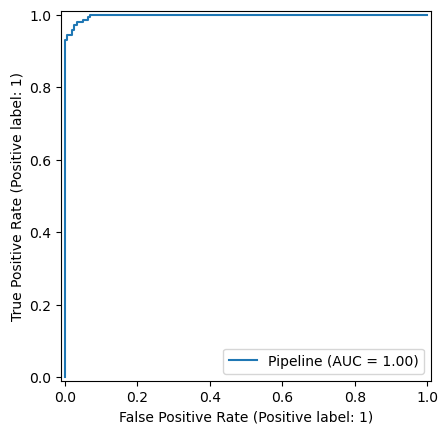

In [456]:
RocCurveDisplay.from_estimator(hybrid_pipeline, X_test, y_test)

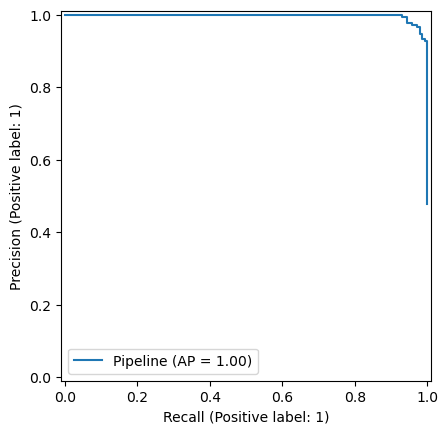

In [457]:
PrecisionRecallDisplay.from_estimator(hybrid_pipeline, X_test, y_test)

In [458]:
label = hybrid_pipeline.predict(sample_banana)
prob = hybrid_pipeline.predict_proba(sample_banana)

print(f'Etykieta: {label}\nPrawdopodobieństwo: {prob}')

Etykieta: [0]
Prawdopodobieństwo: [[0.89203604 0.10796396]]


## Użycie modeli na sztucznych obserwacjach

In [459]:
def model_test(model):
    model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)])

    model_pipeline.fit(X, y)

    b1 = ['Burro', 'Philippines', 4, 19.3, 4, 15.1, 155, 14, 555, 2222, 114]
    b2 = ['Cavendish', 'Ecuador', 5, 20.0, 5, 16.0, 160, 15, 600, 2300, 120]
    
    sample_banana = pd.DataFrame(data=[b1, b2], columns=X.columns)
    prob = model_pipeline.predict_proba(sample_banana)

    return [prob]
    

In [460]:
log = model_test(final_log_model)
svc = model_test(final_svc_model)
knn = model_test(final_knn_model)
hybrid = model_test(hybrid_model)

probabilities = np.concatenate([log, svc, knn, hybrid], axis=0)
reshaped = probabilities.reshape(8, 2)

models = ['Logistic Regression', 'SVC', 'KNN', 'Hybrid']
bananas = ['banan_1', 'banan_2']

index = pd.MultiIndex.from_product([models, bananas], names=["model", "Banan"])
df = pd.DataFrame(reshaped, index=index, columns=["Processing", "Good"])
df.T



model      Logistic Regression                 SVC                 KNN  \
Banan                  banan_1   banan_2   banan_1   banan_2   banan_1   
Processing            0.953264  0.014206  0.878713  0.008747  0.705882   
Good                  0.046736  0.985794  0.121287  0.991253  0.294118   

model                   Hybrid            
Banan        banan_2   banan_1   banan_2  
Processing  0.176471  0.887183  0.039431  
Good        0.823529  0.112817  0.960569